In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
plt.rcParams.update({'font.size': 18})

In [31]:
data = pd.read_csv('imgs/log.csv')
try:
    data["FlatWeights"] = data["FlatWeights"].apply(lambda s: [float(si) for si in s.split(":")])
except:
    data["FlatWeights"] = data["FlatWeights"].apply(lambda s: [0])
data.head()

,Generation,BestEval,FlatWeights,PercentUniqueClassesProduced,PercentOfProductionsValid
0,0,0.861849,[0],0.0,0.0
1,1,0.865660,[0],0.0,0.0
2,100,1.173280,[0],0.0,0.0
3,200,1.479722,[0],0.0,0.0
4,300,1.738843,[0],0.0,0.0


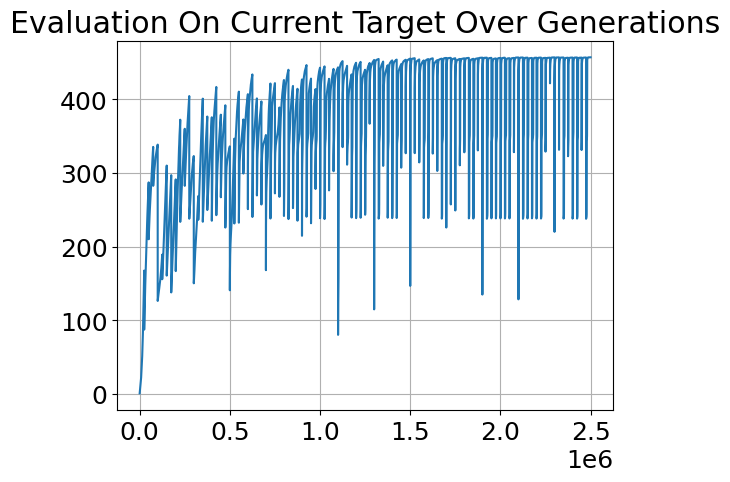

In [32]:
plt.plot(data["Generation"], data["BestEval"])
plt.title("Evaluation On Current Target Over Generations")
plt.grid()
plt.show()

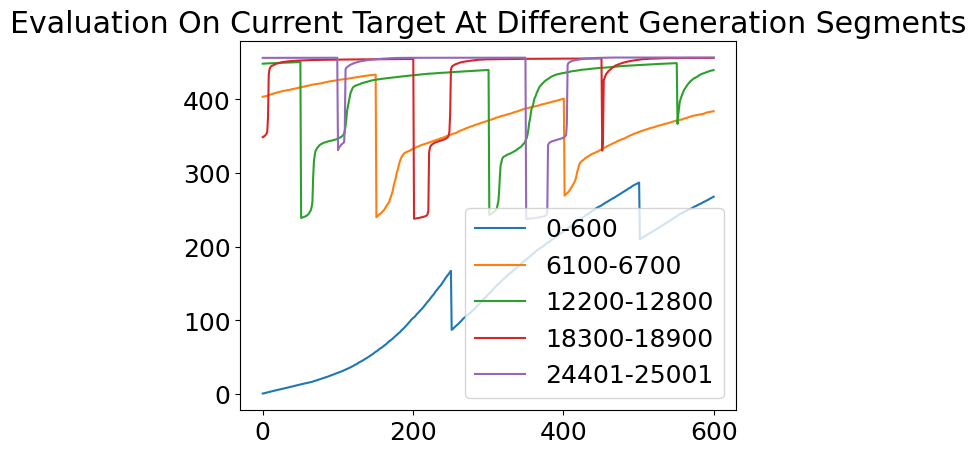

In [33]:
width = 600
graph_num = 5
graph_points = np.linspace(0, len(data["Generation"])-width, graph_num)
for start in graph_points:
    ys = data["BestEval"][int(start):int(start+width)]
    xs = np.linspace(0, len(ys), len(ys))
    plt.plot(xs, ys, label="%s-%s"%(int(start), int(start+width)))
plt.legend()
plt.title("Evaluation On Current Target At Different Generation Segments")
plt.show()

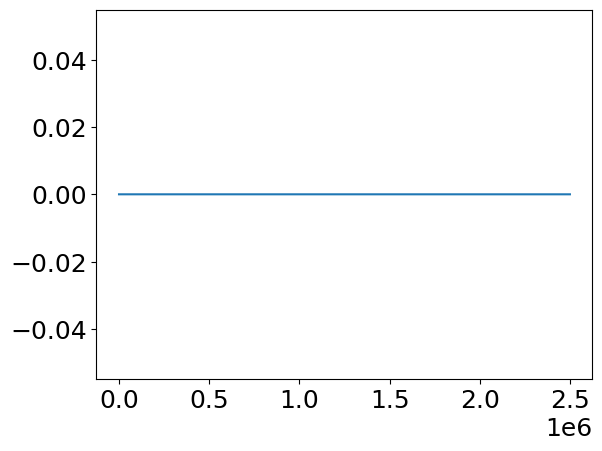

In [34]:
weights_seqs = [[] for _ in range(len(data["FlatWeights"][0]))]
for weights in data["FlatWeights"]:
    for i, w in enumerate(weights):
        weights_seqs[i].append(w)

for ws in weights_seqs:
    plt.plot(data["Generation"], ws)
plt.show()

In [35]:
ddf = pd.read_csv("imgs/d.csv")
ddf["Vals"] = ddf["Vals"].apply(lambda s: [float(si) for si in s.split(":")])
ddf.head()

,Id,Timestep,Vals
0,0,0,"[0.115619, 0.460614, -0.162877, 0.321361, 0.17..."
1,0,1,"[-0.342481, 0.540082, -0.417499, 0.610447, 0.8..."
2,0,2,"[-1.259553, -0.525576, -0.28169, 0.922972, 1.7..."
3,0,3,"[-2.007642, -1.420461, 0.430433, 1.235985, 2.3..."
4,0,4,"[-2.606114, -2.136369, 1.297504, 1.631756, 2.8..."


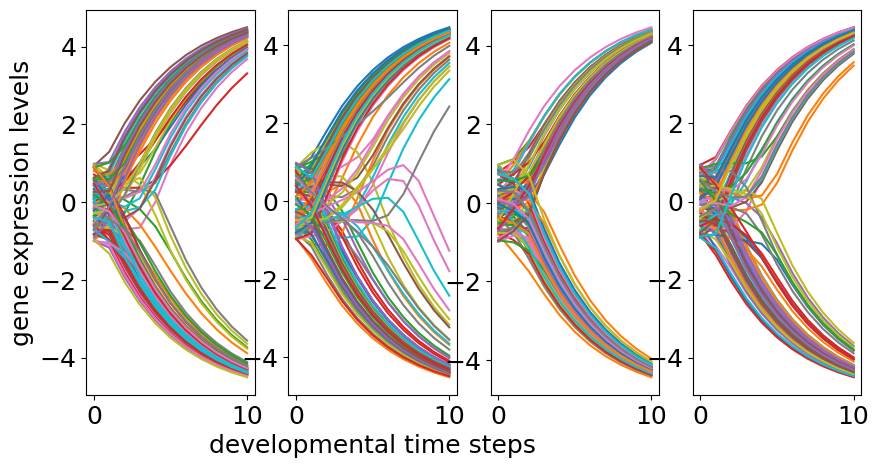

In [36]:
uids = list(ddf["Id"].unique())
fig, axs = plt.subplots(1, len(uids), figsize=(10, 5))
idi = 0
for id in uids:
    ddf_id = ddf[ddf["Id"] == id]
    num_vals = len(list(ddf_id["Vals"])[0])
    vals_seqs = [[] for _ in range(num_vals)]
    for vals in ddf_id["Vals"]:
        for i, v in enumerate(vals):
            vals_seqs[i].append(v)
    for vs in vals_seqs:
        axs[idi].plot(ddf_id["Timestep"], vs)
    idi+=1

axs[0].set_ylabel("gene expression levels")
axs[1].set_xlabel("developmental time steps")
plt.show()

evolved


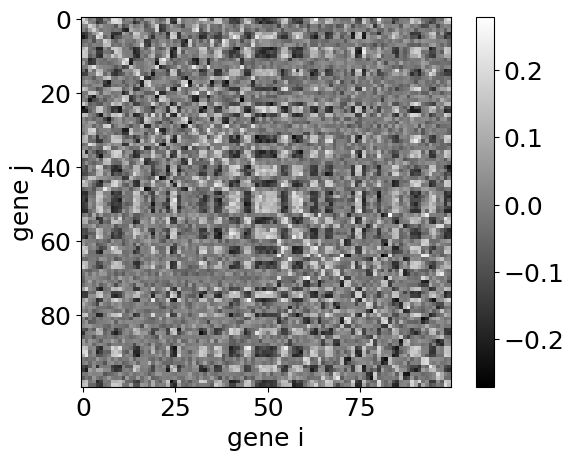

hebbian


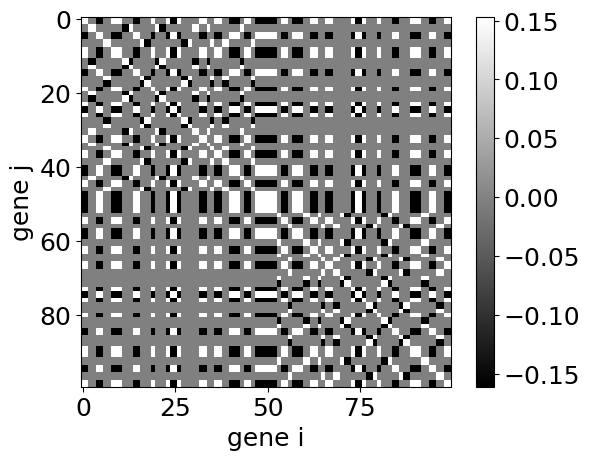

In [37]:
img_ev = np.array(Image.open("imgs/evo_weights_max1.png"))/255.0*2-1
img_hebb = np.array(Image.open("imgs/hebb_weights_max1.png"))/255.0*2-1

print("evolved")
plt.imshow(img_ev, cmap="gray")
plt.xlabel("gene i")
plt.ylabel("gene j")
plt.colorbar()
plt.show()
print("hebbian")
plt.imshow(img_hebb, cmap="gray")
plt.xlabel("gene i")
plt.ylabel("gene j")
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


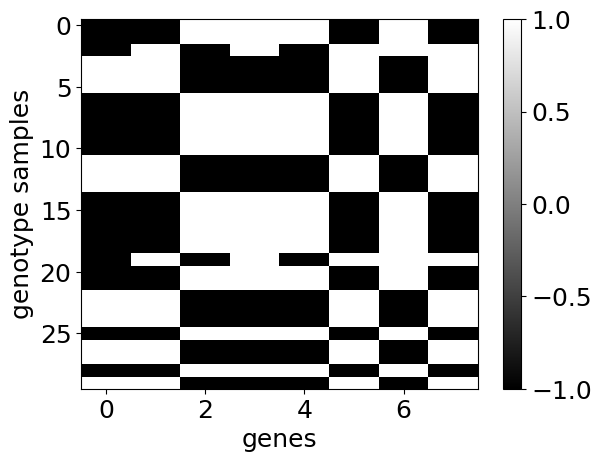

In [38]:
try:
    img_fig12e = np.array(Image.open("imgs/evo_fig12e.png"))/255.0*2-1
    plt.imshow(img_fig12e, cmap="gray", vmin=-1, vmax=1, aspect="auto")
    plt.colorbar()
    plt.xlabel("genes")
    plt.ylabel("genotype samples")
    plt.show()
except:
    print("No fig12e")

In [39]:
try:
    int_diag = np.array(Image.open("imgs/evo_intermediate.png"))/255.0
    plt.imshow(int_diag, cmap="gray")
    plt.axis("off")
    plt.show()
except:
    print("No inter diagram")

No inter diagram


In [40]:
data_bitdense = pd.read_csv('imgs/log.csv')
data_dense = pd.read_csv('imgs/log_dense.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'imgs/log_dense.csv'

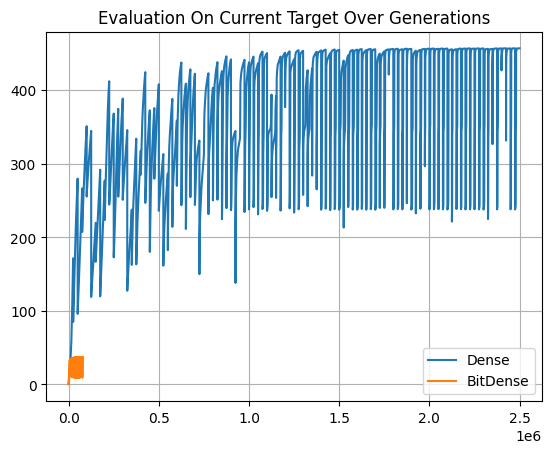

In [ ]:
plt.plot(data_dense["Generation"], data_dense["BestEval"], label="Dense")
plt.plot(data_bitdense["Generation"], data_bitdense["BestEval"], label="BitDense")
plt.title("Evaluation On Current Target Over Generations")
plt.grid()
plt.legend()
plt.show()

In [ ]:
# now do a lot of smoothing on that data and show it again
data_bitdense["BestEvalSmoothed"] = data_bitdense["BestEval"].rolling(window=1000).mean()
data_dense["BestEvalSmoothed"] = data_dense["BestEval"].rolling(window=1000).mean()

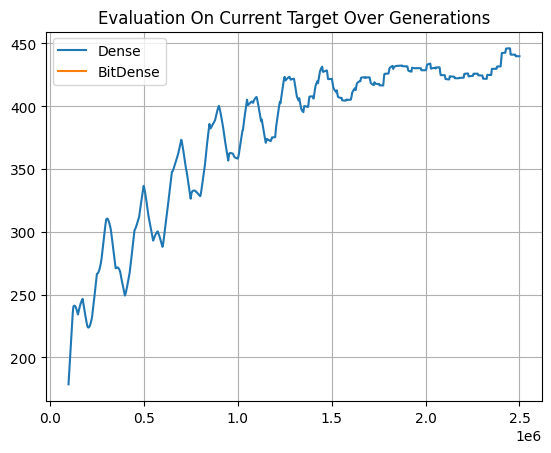

In [ ]:
plt.plot(data_dense["Generation"], data_dense["BestEvalSmoothed"], label="Dense")
plt.plot(data_bitdense["Generation"], data_bitdense["BestEvalSmoothed"], label="BitDense")
plt.title("Evaluation On Current Target Over Generations")
plt.grid()
plt.legend()
plt.show()

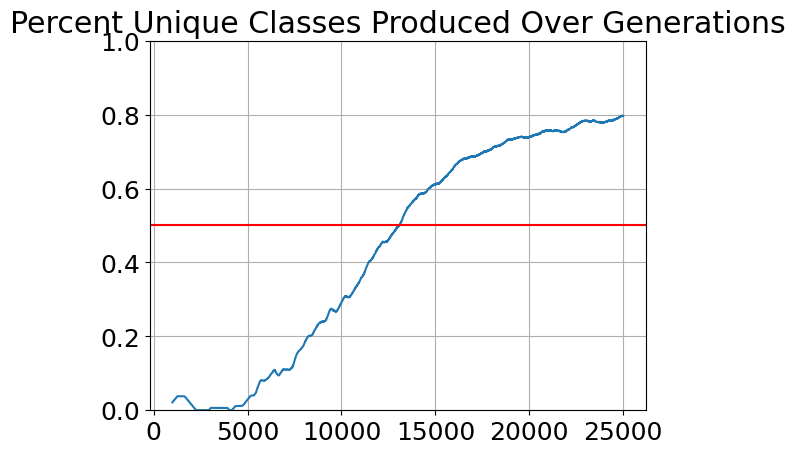

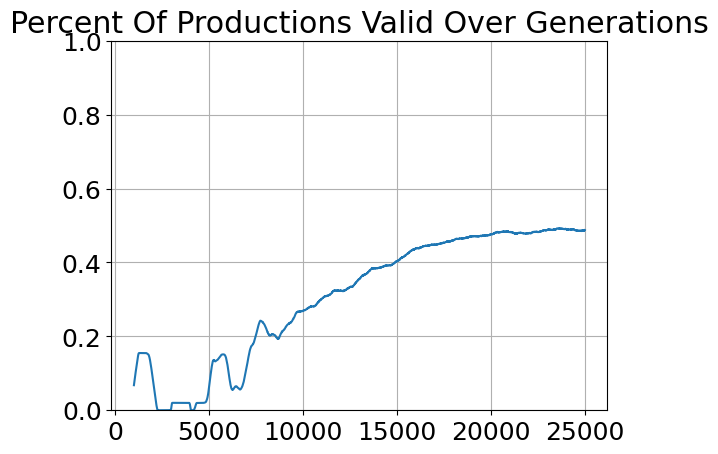

In [43]:
data_maskeddense = pd.read_csv('imgs/log_mdense.csv')
data_dense = pd.read_csv('imgs/log_dense.csv')

# smooth PercentUniqueClassesProduced using sliding window
data_maskeddense["PercentUniqueClassesProducedSmoothed"] = data_maskeddense["PercentUniqueClassesProduced"].rolling(window=1000).mean()
data_maskeddense["PercentOfProductionsValidSmoothed"] = data_maskeddense["PercentOfProductionsValid"].rolling(window=1000).mean()

data_dense["PercentUniqueClassesProducedSmoothed"] = data_dense["PercentUniqueClassesProduced"].rolling(window=1000).mean()
data_dense["PercentOfProductionsValidSmoothed"] = data_dense["PercentOfProductionsValid"].rolling(window=1000).mean()

plt.axhline(0.5, color="black", linestyle="--")
plt.plot(data_maskeddense["PercentUniqueClassesProducedSmoothed"], label="MaskedDense")
plt.plot(data_dense["PercentUniqueClassesProducedSmoothed"], label="Dense")
plt.title("Percent Unique Classes Produced")
plt.grid()
plt.ylim(0, 1)
plt.legend()
plt.show()

plt.plot(data_maskeddense["PercentOfProductionsValidSmoothed"], label="MaskedDense")
plt.plot(data_dense["PercentOfProductionsValidSmoothed"], label="Dense")
plt.title("Percent Of Productions Valid")
plt.grid()
plt.ylim(0, 1)
plt.legend()
plt.show()